In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
seed = 7

In [25]:
df =pd.read_csv('Company_Data.csv')
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [26]:
df2 = pd.cut(df.Sales,bins=[0.16,3.98,6.20,9.46,13.14],labels=['low','medium','average','high'])


In [27]:
df2

0         high
1         high
2         high
3      average
4       medium
        ...   
395       high
396     medium
397    average
398     medium
399       high
Name: Sales, Length: 400, dtype: category
Categories (4, object): ['low' < 'medium' < 'average' < 'high']

In [28]:
df['Sales']=df2

In [29]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,Bad,42,17,Yes,Yes
1,high,111,48,16,260,83,Good,65,10,Yes,Yes
2,high,113,35,10,269,80,Medium,59,12,Yes,Yes
3,average,117,100,4,466,97,Medium,55,14,Yes,Yes
4,medium,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,Good,33,14,Yes,Yes
396,medium,139,23,3,37,120,Medium,55,11,No,Yes
397,average,162,26,12,368,159,Medium,40,18,Yes,Yes
398,medium,100,79,7,284,95,Bad,50,12,Yes,Yes


In [30]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()


In [31]:
df['ShelveLoc']= label_encoder.fit_transform(df['ShelveLoc']) 
df['Urban']= label_encoder.fit_transform(df['Urban']) 
df['US']= label_encoder.fit_transform(df['US']) 


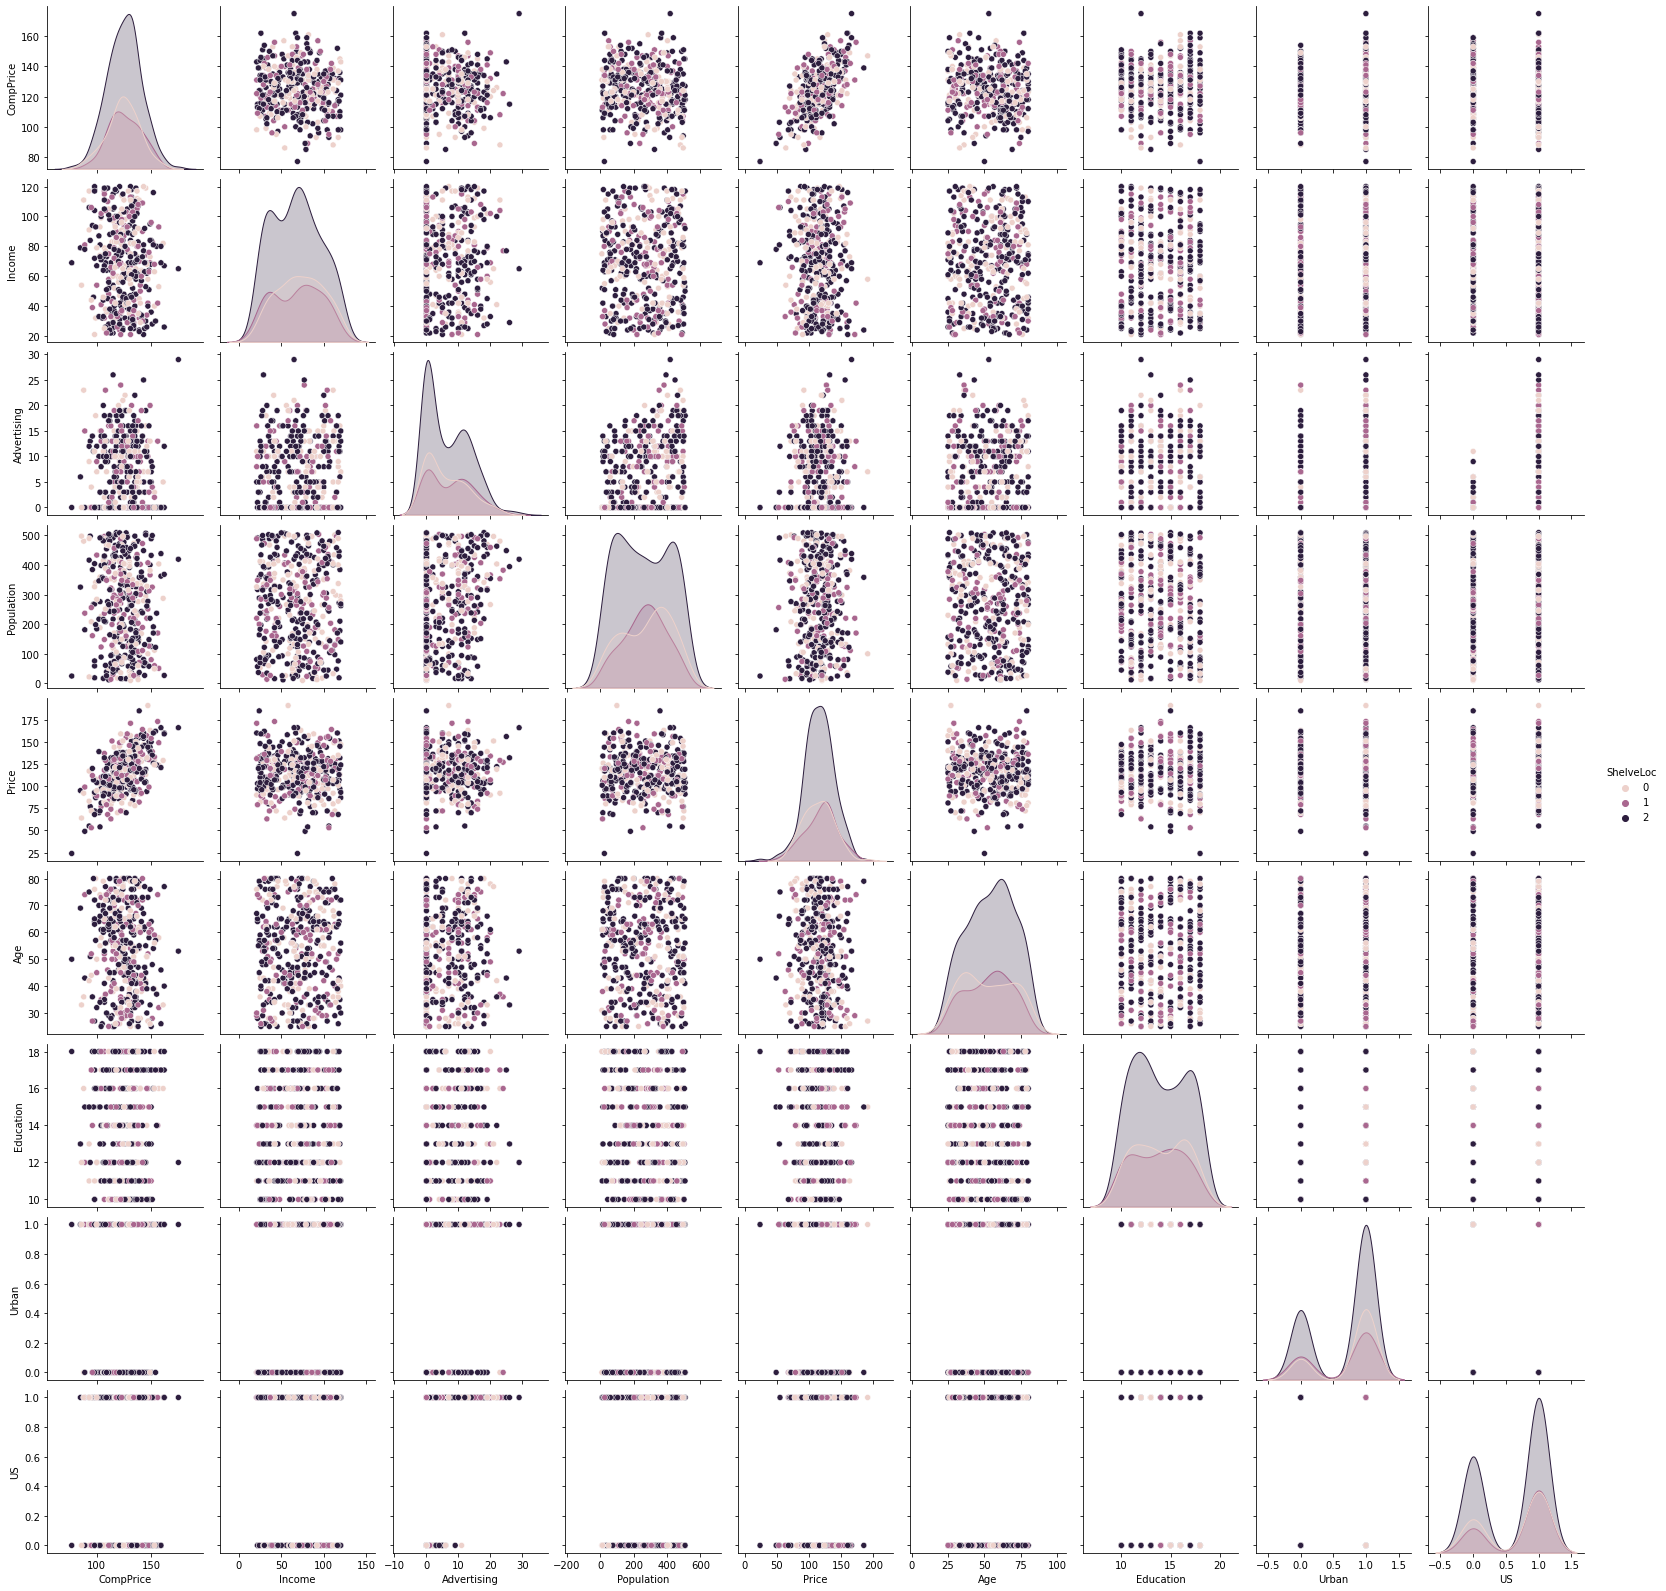

In [32]:
sns.pairplot(data=df, hue = 'ShelveLoc')

In [33]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,high,138,73,11,276,120,0,42,17,1,1
1,high,111,48,16,260,83,1,65,10,1,1
2,high,113,35,10,269,80,2,59,12,1,1
3,average,117,100,4,466,97,2,55,14,1,1
4,medium,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,high,138,108,17,203,128,1,33,14,1,1
396,medium,139,23,3,37,120,2,55,11,0,1
397,average,162,26,12,368,159,2,40,18,1,1
398,medium,100,79,7,284,95,0,50,12,1,1


In [34]:
df['Sales']= label_encoder.fit_transform(df['Sales']) 


In [35]:
df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,3,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,3,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,3,100,79,7,284,95,0,50,12,1,1


In [36]:
df.dropna(inplace=True)
df


,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,1,138,73,11,276,120,0,42,17,1,1
1,1,111,48,16,260,83,1,65,10,1,1
2,1,113,35,10,269,80,2,59,12,1,1
3,0,117,100,4,466,97,2,55,14,1,1
4,3,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,138,108,17,203,128,1,33,14,1,1
396,3,139,23,3,37,120,2,55,11,0,1
397,0,162,26,12,368,159,2,40,18,1,1
398,3,100,79,7,284,95,0,50,12,1,1


In [37]:
x=df.iloc[:,1:]
y=df['Sales']

In [38]:
x

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,138,73,11,276,120,0,42,17,1,1
1,111,48,16,260,83,1,65,10,1,1
2,113,35,10,269,80,2,59,12,1,1
3,117,100,4,466,97,2,55,14,1,1
4,141,64,3,340,128,0,38,13,1,0
...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,1,33,14,1,1
396,139,23,3,37,120,2,55,11,0,1
397,162,26,12,368,159,2,40,18,1,1
398,100,79,7,284,95,0,50,12,1,1


In [39]:
y

0      1
1      1
2      1
3      0
4      3
      ..
395    1
396    3
397    0
398    3
399    1
Name: Sales, Length: 400, dtype: int32

In [40]:
df.Sales.value_counts() 

0    169
3    105
1     80
2     34
4     12
Name: Sales, dtype: int64

In [41]:
colnames = list(df.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US']

In [42]:
kfold = KFold(n_splits=10,shuffle = True, random_state = 40)
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=40)
results = cross_val_score(model, x,y, cv=kfold)
print(results.mean())

0.5349999999999999


In [43]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10, shuffle= True ,random_state= seed)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.53


In [45]:
num_trees = 100
kfold = KFold(n_splits=100, shuffle = True, random_state=42)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=42)
results = cross_val_score(model, x,y, cv=kfold)
print(results.mean())

0.4925
